# **Descriçao do Trabalho**


Neste trabalho tem como objetivo analisar o progresso do mercado de jogos digitais e o comportamento dos consumidores. Avaliando quais plataformas eles costumam utilizar, estilos de jogos que vem fazendo sucesso ao longo das décadas e quais os jogos que fizeram sucesso no decorrer dos anos.

**Coleta de dados**

Para o projeto foi utilizado uma planilha do site da Kaggle com o link sendo: [https://www.kaggle.com/datasets/anandshaw2001/video-game-sales]. Com a licença de uso sendo a CC0: Public Domain.

Após a realização do download dos arquivos foi iniciado o processo de carregamento dos dados na plataforma do Databricks que foi realizada de forma manual utilizando o Data Ingestion subindo um arquivo do tipo .csv.
![Tela Ingestão de dados](https://raw.githubusercontent.com/edilsonchaves/MVP-PUC-RIO/refs/heads/main/Images/Tela%20Ingest%C3%A3o%20de%20dados.png)


Com os dados carregados o catalog e o schema foi deixado a versão default do próprio databricks e foi dado o nome da tabela de vg_sales_cooper
![Tela criação da tabela base](https://raw.githubusercontent.com/edilsonchaves/MVP-PUC-RIO/refs/heads/main/Images/Cria%C3%A7ao%20da%20Tabela%20Bronze.png)

**Modelagem dos dados**

Os dados foram modelados no formato de medalhao separando eles em três etapas: bronze, silver e gold.
- Bronze: A etapa bronze consiste na tabela bruta recém obtida do site Kaggle.
- Prata: Na prata foi feito algumas limpezas na tabela devido a alguns problemas indentificados nas colunas de Anos e Publisher como Ano não informado, publisher desconhecida e também em anos que o numero de jogos registrados não coincidem com a realidade.
- Ouro: Na camada ouro ela se encontra igual a camada prata, todavia ela foi criada para que no futuro com a obtenção de novos dados a partir de outras tabelas ela seja utilizada visando a união dos dados e assim a continuação da pesquisa

**Objetivos do trabalho**

Com este MVP busca compreender um pouco melhor o interesse do público no mercado de desenvolvimento de jogos possibilitando assim compreender assim os interesses das pessoas para que o processo de desenvolvimento de jogos seja mais assertiva.

Questionamentos a serem respondidos
- Quais os jogos que mais tiveram cópias vendidas tanto globalmente como em cada uma das regiões
- Quais os generos que mais tiveram cópias vendidas tanto globalmente como em cada uma das regiões
- Quais as publicadoras que mais tiveram cópias vendidas tanto globalmente como em cada uma das regiões
- Quais as publicadoras que tiveram as melhores médias de cópias vendidas tanto globalmente como em cada uma das regiões
- Compreender quais os gêneros e publicadoras prediletos de cada região ao longo dos anos e verificar a relação com as perguntas anteriores

# **Tabela completa**

Mostrando a tabela com os dados brutos sem nenhuma modificação


In [0]:
select * from vg_sales_cooper limit 10

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.0
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [0]:
COMMENT ON COLUMN vg_sales_cooper.Name IS 'Nome do jogo';
COMMENT ON COLUMN vg_sales_cooper.Platform IS 'Plataforma do jogo';
COMMENT ON COLUMN vg_sales_cooper.Year IS 'Ano de lançamento';
COMMENT ON COLUMN vg_sales_cooper.Genre IS 'Gênero do jogo';
COMMENT ON COLUMN vg_sales_cooper.Publisher IS 'Publicadora do jogo';
COMMENT ON COLUMN vg_sales_cooper.NA_Sales IS 'Vendas na América do Norte (em milhões)';
COMMENT ON COLUMN vg_sales_cooper.EU_Sales IS 'Vendas na Europa (em milhões)';
COMMENT ON COLUMN vg_sales_cooper.JP_Sales IS 'Vendas no Japão (em milhões)';
COMMENT ON COLUMN vg_sales_cooper.Other_Sales IS 'Vendas em outros mercados (em milhões)';
COMMENT ON COLUMN vg_sales_cooper.Global_Sales IS 'Vendas globais (em milhões)';

In [0]:
comment on table vg_sales_cooper is 

"Informações sobre Vendas de Video Games
O quadro a seguir contém dados sobre as vendas de video games em diferentes regiões e plataformas. Inclui informações como:

- Ranking do jogo
- Nome do jogo
- Plataforma de lançamento
- Ano de lançamento
- Gênero
- Publisher

Vendas por Região
As cifras de vendas são divididas por região:

- América do Norte
- Europa
- Japão
- Outras regiões

Além disso, inclui as vendas globais totais."

# **Analise da qualidade dos _Dados_**

In [0]:
drop table if exists vg_sales_silver;

In [0]:
create table IF NOT EXISTS vg_sales_silver deep clone vg_sales_cooper


In [0]:
comment on table vg_sales_silver is 

"
Tabela de dados criada após a análise da qualidade de dados em que foi feita um tratamento nos seguintes pontos:
- Deletando dados com o ano de lançamento acima de 2016 devido a baixa quantidade de dados presentes na amostra nos anos.
- Dados com Years não aplicados.
- Dados com Years abaixo de 1972 pois foi a época em que surgiu o primeiro console doméstico nos EUA.
- Deletando publishers onde o valor é desconhecido ou não aplicavel.
"

- Deletando dados com o ano de lançamento acima de 2016 devido a baixa quantidade de dados presentes na amostra nos anos 
- Dados com Years não aplicados.
- Dados com Years abaixo de 1972 pois foi a época em que surgiu o primeiro console doméstico nos EUA

In [0]:
select * from vg_sales_silver where Year == "N/A" limit 10

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
180,Madden NFL 2004,PS2,N/A,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,N/A,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,N/A,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.0,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,N/A,Fighting,N/A,1.57,1.02,0.0,0.41,3.0
608,Space Invaders,2600,N/A,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
625,Rock Band,X360,N/A,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
650,Frogger's Adventures: Temple of the Frog,GBA,N/A,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.39
653,LEGO Indiana Jones: The Original Adventures,Wii,N/A,Action,LucasArts,1.54,0.63,0.0,0.22,2.39
713,Call of Duty 3,Wii,N/A,Shooter,Activision,1.19,0.84,0.0,0.23,2.26
784,Rock Band,Wii,N/A,Misc,MTV Games,1.35,0.56,0.0,0.2,2.11


In [0]:
delete from vg_sales_silver where Year = "N/A"

num_affected_rows
271


In [0]:
select * from vg_sales_silver where Year > "2016" or  Year < 1972 limit 10

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29
14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03
16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01
16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01


In [0]:
delete from
  vg_sales_silver
where
  Year > 2016 or
  Year < 1972

num_affected_rows
4


Deletando publishers onde o valor é desconhecido ou não aplicavel

In [0]:
select * from vg_sales_silver where  Publisher == "N/A" or Publisher == "Unknown" limit 10

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
942,Gran Turismo Concept 2001 Tokyo,PS2,2001,Racing,Unknown,0.0,1.1,0.42,0.33,1.84
1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,N/A,0.87,0.32,0.0,0.02,1.21
2224,Bentley's Hackpack,GBA,2005,Misc,N/A,0.67,0.25,0.0,0.02,0.93
2238,Teenage Mutant Ninja Turtles,GBA,2003,Action,Unknown,0.67,0.25,0.0,0.02,0.93
2330,Blitz: The League,PS2,2005,Sports,Unknown,0.74,0.03,0.0,0.12,0.89
2493,The Game of Life,PS,1998,Misc,Unknown,0.46,0.31,0.0,0.05,0.83
2546,Final Fantasy Type-0,PSP,2011,Role-Playing,Unknown,0.0,0.0,0.81,0.0,0.81
2831,God Eater,PSP,2010,Action,Unknown,0.0,0.0,0.72,0.0,0.72
3032,RIFT,PC,2011,Role-Playing,Unknown,0.44,0.16,0.0,0.07,0.67
3161,Nicktoons Collection: Game Boy Advance Video Volume 1,GBA,2004,Misc,N/A,0.46,0.17,0.0,0.01,0.64


In [0]:
delete from vg_sales_silver
where Publisher = "N/A" or Publisher = "Unknown"

num_affected_rows
136


In [0]:
drop table if exists vg_sales_gold;

In [0]:
create table IF NOT EXISTS vg_sales_gold deep clone vg_sales_silver

In [0]:
comment on table vg_sales_gold is 

"Tabela criada para a junção de novas tabelas ja tratadas com o objetivo de atualizar a pesquisa executada"

# **Consultas**

## Global

In [0]:
select 
  Name as Titulo,
  Genre,
  Publisher,
  Year,
  cast(sum(Global_Sales) as decimal (10,2)) as Total_Vendas
from 
  vg_sales_gold
group by 
  Name, Genre, Publisher, Year
order by 
  Total_Vendas desc
limit 10

Titulo,Genre,Publisher,Year,Total_Vendas
Wii Sports,Sports,Nintendo,2006,82.74
Super Mario Bros.,Platform,Nintendo,1985,40.24
Grand Theft Auto V,Action,Take-Two Interactive,2013,37.78
Mario Kart Wii,Racing,Nintendo,2008,35.82
Wii Sports Resort,Sports,Nintendo,2009,33.00
Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,1996,31.37
Call of Duty: Modern Warfare 3,Shooter,Activision,2011,30.83
Tetris,Puzzle,Nintendo,1989,30.26
New Super Mario Bros.,Platform,Nintendo,2006,30.01
Call of Duty: Black Ops II,Shooter,Activision,2012,29.72


In [0]:
select 
  Publisher as Publicadora,
  cast(avg(Global_Sales) as decimal(10,4)) as Media_Vendas_Global,
  cast(sum(Global_Sales) as decimal(10,2)) as Total_Vendas_Global,
  count(Name) as Quantidade_Jogos_Publicados
from 
  vg_sales_gold
where 
  Publisher != "N/A"
group by 
  Publisher
having 
  count(Name) >= 5
order by 
  Media_Vendas_Global desc
limit 10

Publicadora,Media_Vendas_Global,Total_Vendas_Global,Quantidade_Jogos_Publicados
Nintendo,2.5638,1784.43,696
Sony Computer Entertainment Europe,1.5927,23.89,15
Microsoft Game Studios,1.3005,245.79,189
Bethesda Softworks,1.1816,81.53,69
Enix Corporation,1.1247,33.74,30
SquareSoft,1.1087,57.65,52
Take-Two Interactive,0.9692,399.30,412
LucasArts,0.9545,84.95,89
989 Studios,0.9514,13.32,14
Hasbro Interactive,0.9512,15.22,16


In [0]:
select 
  Publisher as Publicadora,
  cast(avg(Global_Sales) as decimal(10,4)) as Media_Vendas_Global,
  cast(sum(Global_Sales) as decimal(10,2)) as Total_Vendas_Global,
  count(Name) as Quantidade_Jogos_Publicados
from 
  vg_sales_gold
where 
  Publisher != "N/A"
group by 
  Publisher
order by 
  Total_Vendas_Global desc
limit 10

Publicadora,Media_Vendas_Global,Total_Vendas_Global,Quantidade_Jogos_Publicados
Nintendo,2.5638,1784.43,696
Electronic Arts,0.8166,1093.39,1339
Activision,0.7468,721.41,966
Sony Computer Entertainment,0.8904,607.28,682
Ubisoft,0.5161,473.25,917
Take-Two Interactive,0.9692,399.30,412
THQ,0.4781,340.44,712
Konami Digital Entertainment,0.3385,278.56,823
Sega,0.4296,270.66,630
Namco Bandai Games,0.2733,253.65,928


In [0]:
with top_media as (
  select 
    Publisher,
    cast(avg(Global_Sales) as decimal(10,4)) as Media_Vendas_Global,
    count(Name) as Quantidade_Jogos_Publicados
  from vg_sales_gold
  where Publisher != "N/A"
  group by Publisher
  having count(Name) >= 5
  order by Media_Vendas_Global desc
  limit 10
),
top_total as (
  select 
    Publisher,
    cast(sum(Global_Sales) as decimal(10,2)) as Total_Vendas_Global,
    count(Name) as Quantidade_Jogos_Publicados
  from vg_sales_gold
  where Publisher != "N/A"
  group by Publisher
  having count(Name) >= 5
  order by Total_Vendas_Global desc
  limit 10
)
select 
  m.Publisher as Publicadora,
  m.Media_Vendas_Global,
  t.Total_Vendas_Global,
  m.Quantidade_Jogos_Publicados
from top_media m
inner join top_total t
  on m.Publisher = t.Publisher

Publicadora,Media_Vendas_Global,Total_Vendas_Global,Quantidade_Jogos_Publicados
Nintendo,2.5638,1784.43,696
Take-Two Interactive,0.9692,399.30,412


## Norte America

In [0]:
select 
  Name as Titulo,
  Genre,
  Publisher,
  Year,
  cast(sum(NA_Sales) as decimal (10,2)) as Total_Vendas_Norte_America
from 
  vg_sales_gold
group by 
  Name, Genre, Publisher, Year
order by 
  Total_Vendas_Norte_America desc
limit 10

Titulo,Genre,Publisher,Year,Total_Vendas_Norte_America
Wii Sports,Sports,Nintendo,2006,41.49
Super Mario Bros.,Platform,Nintendo,1985,29.08
Duck Hunt,Shooter,Nintendo,1984,26.93
Tetris,Puzzle,Nintendo,1989,23.20
Call of Duty: Black Ops,Shooter,Activision,2010,17.01
Grand Theft Auto V,Action,Take-Two Interactive,2013,16.64
Mario Kart Wii,Racing,Nintendo,2008,15.85
Wii Sports Resort,Sports,Nintendo,2009,15.75
Call of Duty: Modern Warfare 3,Shooter,Activision,2011,15.58
Kinect Adventures!,Misc,Microsoft Game Studios,2010,14.97


In [0]:
select 
  Publisher as Publicadora,
  cast(avg(NA_Sales) as decimal(10,4)) as Media_Vendas_Norte_America,
  cast(sum(NA_Sales) as decimal(10,2)) as Total_Vendas_Norte_America,
  count(Name) as Quantidade_Jogos_Publicados
from 
  vg_sales_gold
where 
  Publisher != "N/A"
group by 
  Publisher
order by 
  Total_Vendas_Norte_America desc
limit 10

Publicadora,Media_Vendas_Norte_America,Total_Vendas_Norte_America,Quantidade_Jogos_Publicados
Nintendo,1.1721,815.75,696
Electronic Arts,0.4363,584.22,1339
Activision,0.4410,426.01,966
Sony Computer Entertainment,0.3889,265.22,682
Ubisoft,0.2754,252.54,917
Take-Two Interactive,0.5351,220.47,412
THQ,0.2930,208.60,712
Microsoft Game Studios,0.8220,155.35,189
Sega,0.1727,108.78,630
Atari,0.2917,101.23,347


In [0]:
select 
  Publisher as Publicadora,
  cast(avg(NA_Sales) as decimal(10,4)) as Media_Vendas_Norte_America,
  cast(sum(NA_Sales) as decimal(10,2)) as Total_Vendas_Norte_America,
  count(Name) as Quantidade_Jogos_Publicados
from 
  vg_sales_gold
where 
  Publisher != "N/A"
group by 
  Publisher
having 
  count(Name) >= 5
order by 
  Media_Vendas_Norte_America desc
limit 10

Publicadora,Media_Vendas_Norte_America,Total_Vendas_Norte_America,Quantidade_Jogos_Publicados
Nintendo,1.1721,815.75,696
Microsoft Game Studios,0.8220,155.35,189
Hasbro Interactive,0.6869,10.99,16
Parker Bros.,0.6643,4.65,7
989 Studios,0.6593,9.23,14
Sony Computer Entertainment Europe,0.5973,8.96,15
Coleco,0.5740,2.87,5
Bethesda Softworks,0.5714,39.43,69
LucasArts,0.5442,48.43,89
Take-Two Interactive,0.5351,220.47,412


In [0]:
with top_media as (
  select 
    Publisher,
    cast(avg(NA_Sales) as decimal(10,4)) as Media_Vendas_Norte_America,
    count(Name) as Quantidade_Jogos_Publicados
  from vg_sales_gold
  where Publisher != "N/A"
  group by Publisher
  having count(Name) >= 5
  order by Media_Vendas_Norte_America desc
  limit 10
),
top_total as (
  select 
    Publisher,
    cast(sum(NA_Sales) as decimal(10,2)) as Total_Vendas_Norte_America,
    count(Name) as Quantidade_Jogos_Publicados
  from vg_sales_gold
  where Publisher != "N/A"
  group by Publisher
  having count(Name) >= 5
  order by Total_Vendas_Norte_America desc
  limit 10
)
select 
  m.Publisher as Publicadora,
  m.Media_Vendas_Norte_America,
  t.Total_Vendas_Norte_America,
  m.Quantidade_Jogos_Publicados
from top_media m
inner join top_total t
  on m.Publisher = t.Publisher

Publicadora,Media_Vendas_Norte_America,Total_Vendas_Norte_America,Quantidade_Jogos_Publicados
Nintendo,1.1721,815.75,696
Microsoft Game Studios,0.8220,155.35,189
Take-Two Interactive,0.5351,220.47,412


## Europa

In [0]:
select 
  Name as Titulo,
  Genre,
  Publisher,
  Year,
  cast(sum(EU_Sales) as decimal(10,2)) as Total_Vendas_Europa  
from 
  vg_sales_gold
group by 
  Name, Genre, Publisher, Year
order by 
  Total_Vendas_Europa desc
limit 10

Titulo,Genre,Publisher,Year,Total_Vendas_Europa
Wii Sports,Sports,Nintendo,2006,29.02
Grand Theft Auto V,Action,Take-Two Interactive,2013,14.58
Mario Kart Wii,Racing,Nintendo,2008,12.88
FIFA 15,Sports,Electronic Arts,2014,12.40
Call of Duty: Modern Warfare 3,Shooter,Activision,2011,11.29
FIFA 16,Sports,Electronic Arts,2015,11.29
FIFA 14,Sports,Electronic Arts,2013,11.14
Call of Duty: Black Ops II,Shooter,Activision,2012,11.05
Wii Sports Resort,Sports,Nintendo,2009,11.01
Nintendogs,Simulation,Nintendo,2005,11.00


In [0]:
select 
  Publisher as Publicadora,
  cast(avg(EU_Sales) as decimal(10,4)) as Media_Vendas_Europa,
  cast(sum(EU_Sales) as decimal(10,2)) as Total_Vendas_Europa,
  count(Name) as Quantidade_Jogos_Publicados
from 
  vg_sales_gold
where 
  Publisher != "N/A"
group by 
  Publisher
order by 
  Total_Vendas_Europa desc
limit 10

Publicadora,Media_Vendas_Europa,Total_Vendas_Europa,Quantidade_Jogos_Publicados
Nintendo,0.6010,418.30,696
Electronic Arts,0.2744,367.38,1339
Activision,0.2212,213.72,966
Sony Computer Entertainment,0.2750,187.55,682
Ubisoft,0.1778,163.03,917
Take-Two Interactive,0.2863,117.95,412
THQ,0.1329,94.60,712
Sega,0.1292,81.41,630
Konami Digital Entertainment,0.0834,68.62,823
Microsoft Game Studios,0.3630,68.61,189


In [0]:
select 
  Publisher as Publicadora,
  cast(avg(EU_Sales) as decimal(10,4)) as Media_Vendas_Europa,
  cast(sum(EU_Sales) as decimal(10,2)) as Total_Vendas_Europa,
  count(Name) as Quantidade_Jogos_Publicados
from 
  vg_sales_gold
where 
  Publisher != "N/A"
group by 
  Publisher
having 
  count(Name) >= 5
order by 
  Media_Vendas_Europa desc
limit 10

Publicadora,Media_Vendas_Europa,Total_Vendas_Europa,Quantidade_Jogos_Publicados
Nintendo,0.6010,418.30,696
Sony Computer Entertainment Europe,0.6000,9.00,15
Bethesda Softworks,0.4417,30.48,69
Fox Interactive,0.3988,3.19,8
Microsoft Game Studios,0.3630,68.61,189
Universal Interactive,0.3027,6.66,22
LucasArts,0.2921,26.00,89
Take-Two Interactive,0.2863,117.95,412
Sony Computer Entertainment,0.2750,187.55,682
Electronic Arts,0.2744,367.38,1339


In [0]:
with top_media as (
  select 
    Publisher,
    cast(avg(EU_Sales) as decimal(10,4)) as Media_Vendas_Europa,
    count(Name) as Quantidade_Jogos_Publicados
  from vg_sales_gold
  where Publisher != "N/A"
  group by Publisher
  having count(Name) >= 5
  order by Media_Vendas_Europa desc
  limit 10
),
top_total as (
  select 
    Publisher,
    cast(sum(EU_Sales) as decimal(10,2)) as Total_Vendas_Europa,
    count(Name) as Quantidade_Jogos_Publicados
  from vg_sales_gold
  where Publisher != "N/A"
  group by Publisher
  having count(Name) >= 5
  order by Total_Vendas_Europa desc
  limit 10
)
select 
  m.Publisher as Publicadora,
  m.Media_Vendas_Europa,
  t.Total_Vendas_Europa,
  m.Quantidade_Jogos_Publicados
from top_media m
inner join top_total t
  on m.Publisher = t.Publisher

Publicadora,Media_Vendas_Europa,Total_Vendas_Europa,Quantidade_Jogos_Publicados
Nintendo,0.6010,418.30,696
Microsoft Game Studios,0.3630,68.61,189
Take-Two Interactive,0.2863,117.95,412
Sony Computer Entertainment,0.2750,187.55,682
Electronic Arts,0.2744,367.38,1339


## Japao

In [0]:
select 
  Name as Titulo,
  Genre,
  Publisher,
  Year,
  sum(JP_Sales) as Total_Vendas_Japao
from 
  vg_sales_gold
group by 
  Name, Genre, Publisher, Year
order by 
  Total_Vendas_Japao desc
limit 10

Titulo,Genre,Publisher,Year,Total_Vendas_Japao
Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,1996,10.22
Pokemon Gold/Pokemon Silver,Role-Playing,Nintendo,1999,7.2
Super Mario Bros.,Platform,Nintendo,1985,6.81
New Super Mario Bros.,Platform,Nintendo,2006,6.5
Pokemon Diamond/Pokemon Pearl,Role-Playing,Nintendo,2006,6.04
Pokemon Black/Pokemon White,Role-Playing,Nintendo,2010,5.65
Pokemon Ruby/Pokemon Sapphire,Role-Playing,Nintendo,2002,5.38
Animal Crossing: Wild World,Simulation,Nintendo,2005,5.33
Brain Age 2: More Training in Minutes a Day,Puzzle,Nintendo,2005,5.32
Monster Hunter Freedom 3,Role-Playing,Capcom,2010,4.87


In [0]:
select 
  Publisher as Publicadora,
  cast(avg(JP_Sales) as decimal(10,4)) as Media_Vendas_Japao,
  cast(sum(JP_Sales) as decimal(10,2)) as Total_Vendas_Japao,
  count(Name) as Quantidade_Jogos_Publicados
from 
  vg_sales_gold
where 
  Publisher != "N/A"
group by 
  Publisher
order by 
  Total_Vendas_Japao desc
limit 10

Publicadora,Media_Vendas_Japao,Total_Vendas_Japao,Quantidade_Jogos_Publicados
Nintendo,0.6537,454.99,696
Namco Bandai Games,0.1367,126.84,928
Konami Digital Entertainment,0.1105,90.93,823
Sony Computer Entertainment,0.1087,74.10,682
Capcom,0.1792,67.38,376
Sega,0.0891,56.15,630
Square Enix,0.2155,49.79,231
SquareSoft,0.7717,40.13,52
Enix Corporation,1.0800,32.40,30
Tecmo Koei,0.0864,29.21,338


In [0]:
select 
  Publisher as Publicadora,
  cast(avg(JP_Sales) as decimal(10,4)) as Media_Vendas_Japao,
  cast(sum(JP_Sales) as decimal(10,2)) as Total_Vendas_Japao,
  count(Name) as Quantidade_Jogos_Publicados
from 
  vg_sales_gold
where 
  Publisher != "N/A"
group by 
  Publisher
having 
  count(Name) >= 5
order by 
  Media_Vendas_Japao desc
limit 10

Publicadora,Media_Vendas_Japao,Total_Vendas_Japao,Quantidade_Jogos_Publicados
Enix Corporation,1.0800,32.40,30
SquareSoft,0.7717,40.13,52
Nintendo,0.6537,454.99,696
ASCII Entertainment,0.4700,9.40,20
Square,0.4333,2.60,6
Level 5,0.4315,11.65,27
Compile,0.3917,2.35,6
Hudson Soft,0.2372,19.21,81
Banpresto,0.2252,16.44,73
Human Entertainment,0.2169,2.82,13


In [0]:
with top_media as (
  select 
    Publisher,
    cast(avg(JP_Sales) as decimal(10,4)) as Media_Vendas_Japao,
    count(Name) as Quantidade_Jogos_Publicados
  from vg_sales_gold
  where Publisher != "N/A"
  group by Publisher
  having count(Name) >= 5
  order by Media_Vendas_Japao desc
  limit 10
),
top_total as (
  select 
    Publisher,
    cast(sum(JP_Sales) as decimal(10,2)) as Total_Vendas_Japao,
    count(Name) as Quantidade_Jogos_Publicados
  from vg_sales_gold
  where Publisher != "N/A"
  group by Publisher
  having count(Name) >= 5
  order by Total_Vendas_Japao desc
  limit 10
)
select 
  m.Publisher as Publicadora,
  m.Media_Vendas_Japao,
  t.Total_Vendas_Japao,
  m.Quantidade_Jogos_Publicados
from top_media m
inner join top_total t
  on m.Publisher = t.Publisher

Publicadora,Media_Vendas_Japao,Total_Vendas_Japao,Quantidade_Jogos_Publicados
Enix Corporation,1.0800,32.40,30
SquareSoft,0.7717,40.13,52
Nintendo,0.6537,454.99,696


## Resto Do Mundo

In [0]:
select 
  Name as Titulo,
  Genre,
  Publisher,
  Year,
  cast(sum(Other_Sales) as decimal(10,2)) as Total_Vendas_Resto_Do_Mundo
from 
  vg_sales_gold
group by 
  Name, Genre, Publisher, Year
order by 
  Total_Vendas_Resto_Do_Mundo desc
limit 10

Titulo,Genre,Publisher,Year,Total_Vendas_Resto_Do_Mundo
Grand Theft Auto: San Andreas,Action,Take-Two Interactive,2004,10.57
Wii Sports,Sports,Nintendo,2006,8.46
Gran Turismo 4,Racing,Sony Computer Entertainment,2004,7.53
Grand Theft Auto V,Action,Take-Two Interactive,2013,5.52
Call of Duty: Black Ops II,Shooter,Activision,2012,3.88
FIFA Soccer 08,Sports,Electronic Arts,2007,3.53
Call of Duty: Black Ops 3,Shooter,Activision,2015,3.42
Call of Duty: Modern Warfare 3,Shooter,Activision,2011,3.35
Mario Kart Wii,Racing,Nintendo,2008,3.31
FIFA 15,Sports,Electronic Arts,2014,3.29


In [0]:
select 
  Publisher as Publicadora,
  cast(avg(Other_Sales) as decimal(10,4)) as Media_Vendas_Resto_Do_Mundo,
  cast(sum(Other_Sales) as decimal(10,2)) as Total_Vendas_Resto_Do_Mundo,
  count(Name) as Quantidade_Jogos_Publicados
from 
  vg_sales_gold
where 
  Publisher != "N/A"
group by 
  Publisher
order by 
  Total_Vendas_Resto_Do_Mundo desc
limit 10

Publicadora,Media_Vendas_Resto_Do_Mundo,Total_Vendas_Resto_Do_Mundo,Quantidade_Jogos_Publicados
Electronic Arts,0.0953,127.63,1339
Nintendo,0.1368,95.19,696
Sony Computer Entertainment,0.1179,80.40,682
Activision,0.0774,74.79,966
Take-Two Interactive,0.1340,55.20,412
Ubisoft,0.0547,50.14,917
THQ,0.0451,32.11,712
Konami Digital Entertainment,0.0363,29.91,823
Sega,0.0386,24.30,630
Microsoft Game Studios,0.0982,18.56,189


In [0]:
select 
  Publisher as Publicadora,
  cast(avg(Other_Sales) as decimal(10,4)) as Media_Vendas_Resto_Do_Mundo,
  cast(sum(Other_Sales) as decimal(10,2)) as Total_Vendas_Resto_Do_Mundo,
  count(Name) as Quantidade_Jogos_Publicados
from 
  vg_sales_gold
where 
  Publisher != "N/A"
group by 
  Publisher
having 
  count(Name) >= 5
order by 
  Media_Vendas_Resto_Do_Mundo desc
limit 10

Publicadora,Media_Vendas_Resto_Do_Mundo,Total_Vendas_Resto_Do_Mundo,Quantidade_Jogos_Publicados
Sony Computer Entertainment Europe,0.2280,3.42,15
Bethesda Softworks,0.1464,10.10,69
Nintendo,0.1368,95.19,696
Take-Two Interactive,0.1340,55.20,412
Sony Computer Entertainment,0.1179,80.40,682
LucasArts,0.1155,10.28,89
Microsoft Game Studios,0.0982,18.56,189
Electronic Arts,0.0953,127.63,1339
Warner Bros. Interactive Entertainment,0.0790,17.14,217
Universal Interactive,0.0786,1.73,22


In [0]:
with top_media as (
  select 
    Publisher,
    cast(avg(Other_Sales) as decimal(10,4)) as Media_Vendas_Resto_Do_Mundo,
    count(Name) as Quantidade_Jogos_Publicados
  from vg_sales_gold
  where Publisher != "N/A"
  group by Publisher
  having count(Name) >= 5
  order by Media_Vendas_Resto_Do_Mundo desc
  limit 10
),
top_total as (
  select 
    Publisher,
    cast(sum(Other_Sales) as decimal(10,2)) as Total_Vendas_Resto_Do_Mundo,
    count(Name) as Quantidade_Jogos_Publicados
  from vg_sales_gold
  where Publisher != "N/A"
  group by Publisher
  having count(Name) >= 5
  order by Total_Vendas_Resto_Do_Mundo desc
  limit 10
)
select 
  m.Publisher as Publicadora,
  m.Media_Vendas_Resto_Do_Mundo,
  t.Total_Vendas_Resto_Do_Mundo,
  m.Quantidade_Jogos_Publicados
from top_media m
inner join top_total t
  on m.Publisher = t.Publisher

Publicadora,Media_Vendas_Resto_Do_Mundo,Total_Vendas_Resto_Do_Mundo,Quantidade_Jogos_Publicados
Nintendo,0.1368,95.19,696
Take-Two Interactive,0.1340,55.20,412
Sony Computer Entertainment,0.1179,80.40,682
Microsoft Game Studios,0.0982,18.56,189
Electronic Arts,0.0953,127.63,1339


## **Por Empresa**

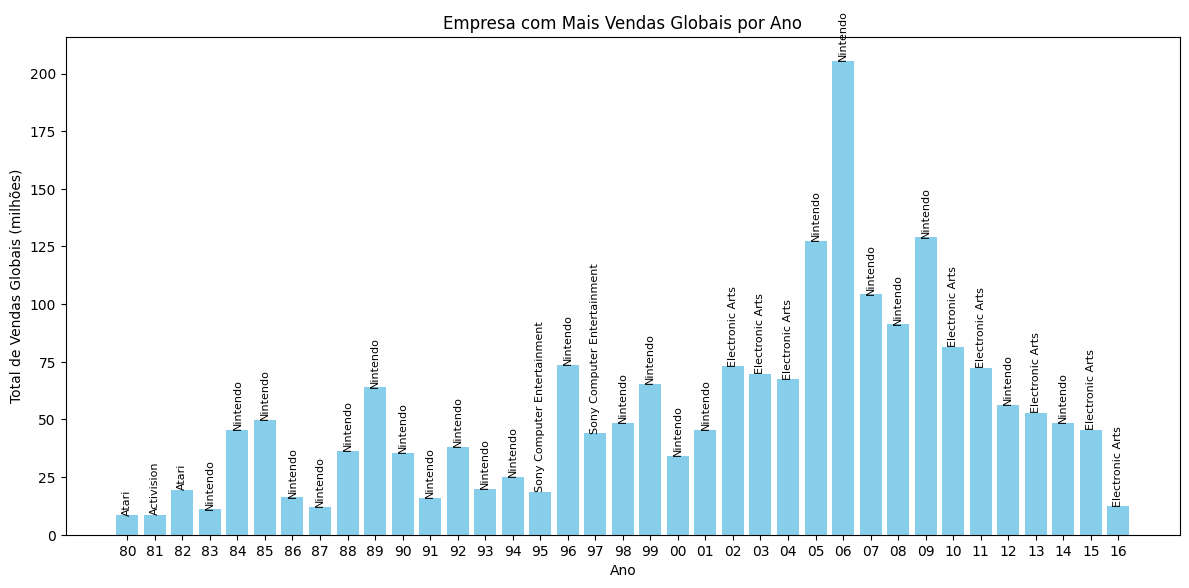

In [0]:
%python
df = spark.sql("""
  SELECT
    Year,
    Publisher,
    SUM(Global_Sales) AS Total_Vendas_Global
  FROM vg_sales_gold
  WHERE Publisher != "N/A"
  GROUP BY Year, Publisher
""")

from pyspark.sql.window import Window
import pyspark.sql.functions as F

window = Window.partitionBy("Year").orderBy(F.desc("Total_Vendas_Global"))
df_top = df.withColumn("rank", F.row_number().over(window)).filter(F.col("rank") == 1)

pandas_df = df_top.select("Year", "Publisher", "Total_Vendas_Global").orderBy("Year").toPandas()
pandas_df["Ano_2dig"] = pandas_df["Year"].astype(str).str[-2:]
pandas_df = pandas_df.sort_values("Year")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(pandas_df["Ano_2dig"], pandas_df["Total_Vendas_Global"], color='skyblue')
for i, row in pandas_df.iterrows():
    plt.text(row["Ano_2dig"], row["Total_Vendas_Global"], row["Publisher"], ha='center', va='bottom', fontsize=8, rotation=90)
plt.xlabel("Ano")
plt.ylabel("Total de Vendas Globais (milhões)")
plt.title("Empresa com Mais Vendas Globais por Ano")
plt.tight_layout()
plt.show()

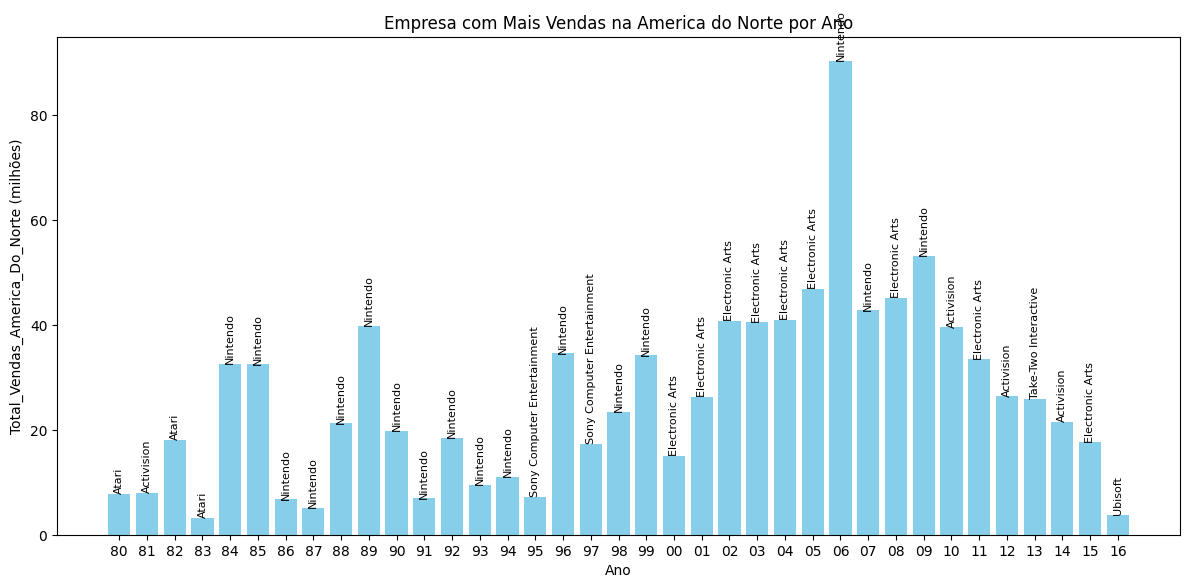

In [0]:
%python
df = spark.sql("""
  SELECT
    Year,
    Publisher,
    SUM(NA_Sales) AS Total_Vendas_America_Do_Norte
  FROM vg_sales_gold
  WHERE Publisher != "N/A"
  GROUP BY Year, Publisher
""")

from pyspark.sql.window import Window
import pyspark.sql.functions as F

window = Window.partitionBy("Year").orderBy(F.desc("Total_Vendas_America_Do_Norte"))
df_top = df.withColumn("rank", F.row_number().over(window)).filter(F.col("rank") == 1)

pandas_df = df_top.select("Year", "Publisher", "Total_Vendas_America_Do_Norte").orderBy("Year").toPandas()
pandas_df["Ano_2dig"] = pandas_df["Year"].astype(str).str[-2:]
pandas_df = pandas_df.sort_values("Year")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(pandas_df["Ano_2dig"], pandas_df["Total_Vendas_America_Do_Norte"], color='skyblue')
for i, row in pandas_df.iterrows():
    plt.text(row["Ano_2dig"], row["Total_Vendas_America_Do_Norte"], row["Publisher"], ha='center', va='bottom', fontsize=8, rotation=90)
plt.xlabel("Ano")
plt.ylabel("Total_Vendas_America_Do_Norte (milhões)")
plt.title("Empresa com Mais Vendas na America do Norte por Ano")
plt.tight_layout()
plt.show()

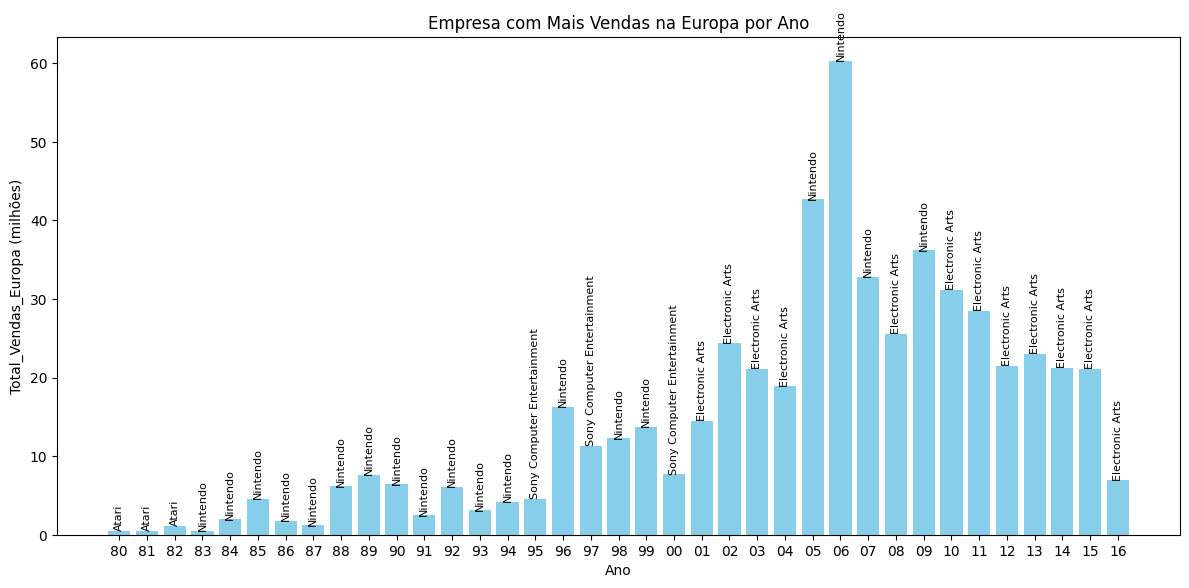

In [0]:
%python
from pyspark.sql.window import Window
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

df = spark.sql("""
  SELECT
    Year,
    Publisher,
    SUM(EU_Sales) AS Total_Vendas_Europa
  FROM vg_sales_gold
  WHERE Publisher != "N/A"
  GROUP BY Year, Publisher
""")

window = Window.partitionBy("Year").orderBy(F.desc("Total_Vendas_Europa"))
df_top = df.withColumn("rank", F.row_number().over(window)).filter(F.col("rank") == 1)

pandas_df = df_top.select("Year", "Publisher", "Total_Vendas_Europa").orderBy("Year").toPandas()
pandas_df["Ano_2dig"] = pandas_df["Year"].astype(str).str[-2:]
pandas_df = pandas_df.sort_values("Year")

plt.figure(figsize=(12,6))
plt.bar(pandas_df["Ano_2dig"], pandas_df["Total_Vendas_Europa"], color='skyblue')
for i, row in pandas_df.iterrows():
    plt.text(row["Ano_2dig"], row["Total_Vendas_Europa"], row["Publisher"], ha='center', va='bottom', fontsize=8, rotation=90)
plt.xlabel("Ano")
plt.ylabel("Total_Vendas_Europa (milhões)")
plt.title("Empresa com Mais Vendas na Europa por Ano")
plt.tight_layout()
plt.show()

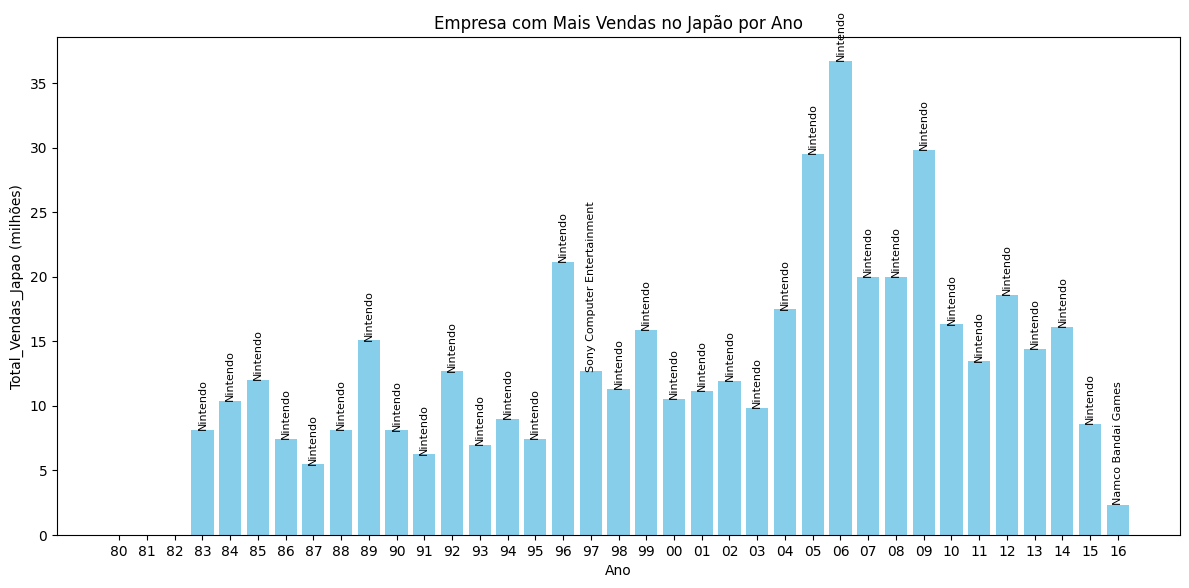

In [0]:
%python
from pyspark.sql.window import Window
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

df = spark.sql("""
  SELECT
    Year,
    Publisher,
    SUM(JP_Sales) AS Total_Vendas_Japao
  FROM vg_sales_gold
  WHERE Publisher != "N/A"
  GROUP BY Year, Publisher
""")

window = Window.partitionBy("Year").orderBy(F.desc("Total_Vendas_Japao"))
df_top = df.withColumn("rank", F.row_number().over(window)).filter(F.col("rank") == 1)

pandas_df = df_top.select("Year", "Publisher", "Total_Vendas_Japao").orderBy("Year").toPandas()
pandas_df["Ano_2dig"] = pandas_df["Year"].astype(str).str[-2:]
pandas_df = pandas_df.sort_values("Year")

plt.figure(figsize=(12,6))
plt.bar(pandas_df["Ano_2dig"], pandas_df["Total_Vendas_Japao"], color='skyblue')
for i, row in pandas_df.iterrows():
    if row["Total_Vendas_Japao"] > 0:
        plt.text(row["Ano_2dig"], row["Total_Vendas_Japao"], row["Publisher"], ha='center', va='bottom', fontsize=8, rotation=90)
plt.xlabel("Ano")
plt.ylabel("Total_Vendas_Japao (milhões)")
plt.title("Empresa com Mais Vendas no Japão por Ano")
plt.tight_layout()
plt.show()

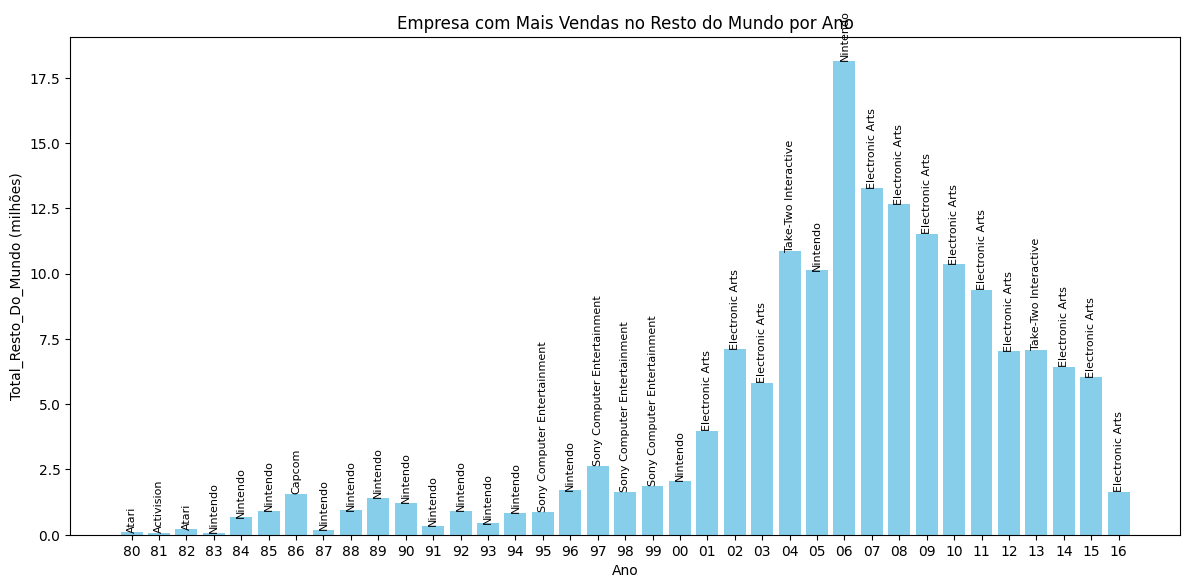

In [0]:
%python
from pyspark.sql.window import Window
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

df = spark.sql("""
  SELECT
    Year,
    Publisher,
    SUM(Other_Sales) AS Total_Resto_Do_Mundo
  FROM vg_sales_gold
  WHERE Publisher != "N/A"
  GROUP BY Year, Publisher
""")

window = Window.partitionBy("Year").orderBy(F.desc("Total_Resto_Do_Mundo"))
df_top = df.withColumn("rank", F.row_number().over(window)).filter(F.col("rank") == 1)

pandas_df = df_top.select("Year", "Publisher", "Total_Resto_Do_Mundo").orderBy("Year").toPandas()
pandas_df["Ano_2dig"] = pandas_df["Year"].astype(str).str[-2:]
pandas_df = pandas_df.sort_values("Year")

plt.figure(figsize=(12,6))
plt.bar(pandas_df["Ano_2dig"], pandas_df["Total_Resto_Do_Mundo"], color='skyblue')
for i, row in pandas_df.iterrows():
    plt.text(row["Ano_2dig"], row["Total_Resto_Do_Mundo"], row["Publisher"], ha='center', va='bottom', fontsize=8, rotation=90)
plt.xlabel("Ano")
plt.ylabel("Total_Resto_Do_Mundo (milhões)")
plt.title("Empresa com Mais Vendas no Resto do Mundo por Ano")
plt.tight_layout()
plt.show()

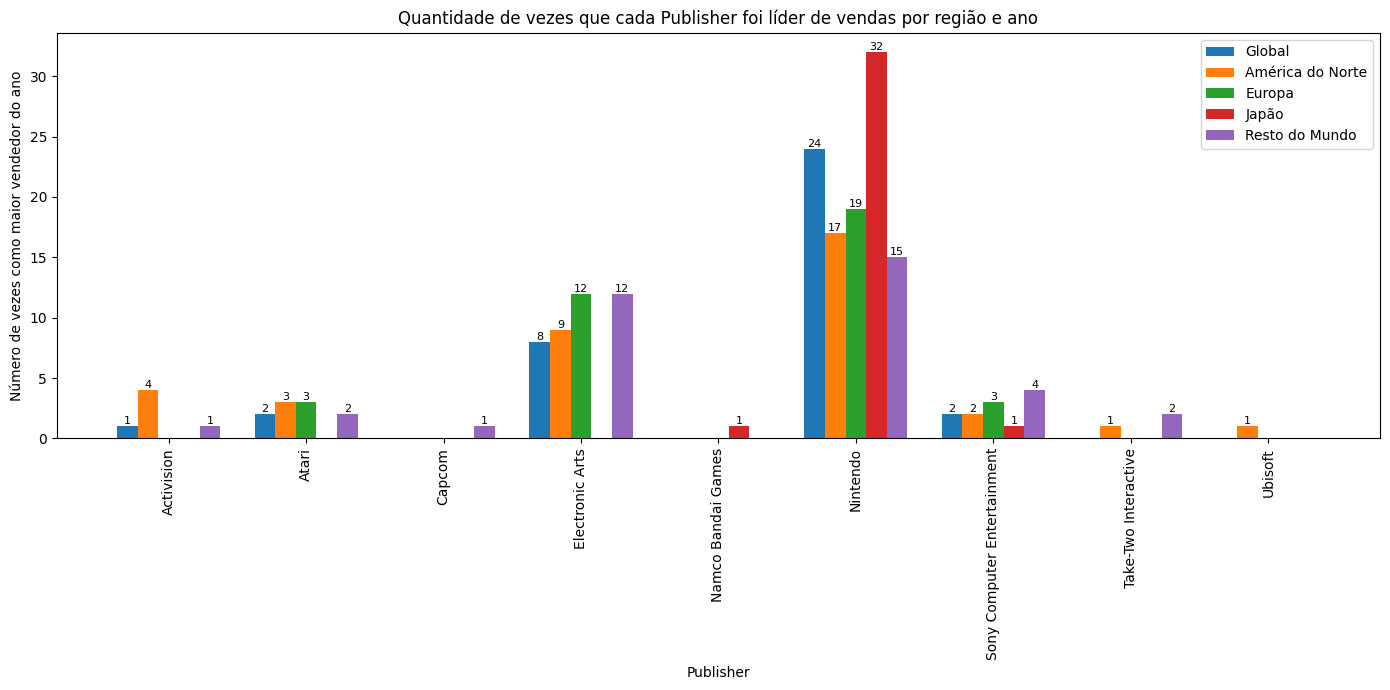

In [0]:
%python
import matplotlib.pyplot as plt
from pyspark.sql.window import Window
import pyspark.sql.functions as F

regions = [
    ("Global_Sales", "Global"),
    ("NA_Sales", "América do Norte"),
    ("EU_Sales", "Europa"),
    ("JP_Sales", "Japão"),
    ("Other_Sales", "Resto do Mundo")
]

publisher_counts = {}

for sales_col, region_name in regions:
    df = spark.sql(f"""
      SELECT
        Year,
        Publisher,
        SUM({sales_col}) AS Total_Vendas
      FROM vg_sales_gold
      WHERE Publisher != "N/A"
      GROUP BY Year, Publisher
    """)

    window = Window.partitionBy("Year").orderBy(F.desc("Total_Vendas"))
    df_top = df.withColumn("rank", F.row_number().over(window)).filter(F.col("rank") == 1)
    # Filtra para considerar apenas anos onde o maior valor de vendas é > 0
    df_top = df_top.filter(F.col("Total_Vendas") > 0)
    pandas_df = df_top.select("Year", "Publisher").toPandas()
    counts = pandas_df["Publisher"].value_counts()
    publisher_counts[region_name] = counts

publishers = set()
for counts in publisher_counts.values():
    publishers.update(counts.index)

publishers = sorted(list(publishers))
region_names = [r[1] for r in regions]
data = []
for region in region_names:
    counts = publisher_counts[region]
    data.append([counts.get(pub, 0) for pub in publishers])

plt.figure(figsize=(14,7))
bar_width = 0.15
x = range(len(publishers))
bars = []
for i, region in enumerate(region_names):
    bar = plt.bar([p + i*bar_width for p in x], data[i], width=bar_width, label=region)
    bars.append(bar)
    for rect in bar:
        height = rect.get_height()
        if height > 0:
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8, rotation=0)

plt.xticks([p + bar_width*2 for p in x], publishers, rotation=90)
plt.xlabel("Publisher")
plt.ylabel("Número de vezes como maior vendedor do ano")
plt.title("Quantidade de vezes que cada Publisher foi líder de vendas por região e ano")
plt.legend()
plt.tight_layout()
plt.show()

## **Por Genero**

In [0]:
select Genre from vg_sales_gold group by Genre order by Genre asc

Genre
Action
Adventure
Fighting
Misc
Platform
Puzzle
Racing
Role-Playing
Shooter
Simulation


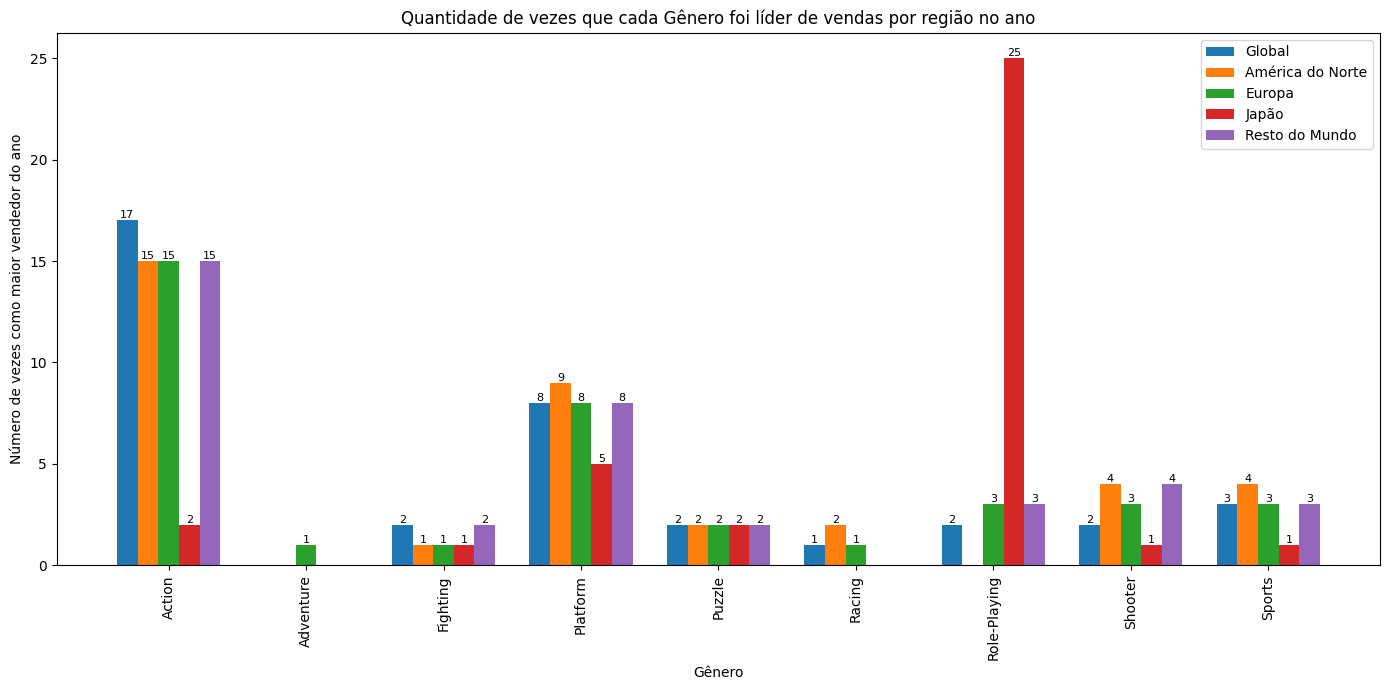

In [0]:
%python
import matplotlib.pyplot as plt
from pyspark.sql.window import Window
import pyspark.sql.functions as F

regions = [
    ("Global_Sales", "Global"),
    ("NA_Sales", "América do Norte"),
    ("EU_Sales", "Europa"),
    ("JP_Sales", "Japão"),
    ("Other_Sales", "Resto do Mundo")
]

genre_counts = {}

for sales_col, region_name in regions:
    df = spark.sql(f"""
      SELECT
        Year,
        Genre,
        SUM({sales_col}) AS Total_Vendas
      FROM vg_sales_gold
      GROUP BY Year, Genre
    """)

    window = Window.partitionBy("Year").orderBy(F.desc("Total_Vendas"))
    df_top = df.withColumn("rank", F.row_number().over(window)).filter(F.col("rank") == 1)
    pandas_df = df_top.select("Year", "Genre").toPandas()
    counts = pandas_df["Genre"].value_counts()
    genre_counts[region_name] = counts

genres = set()
for counts in genre_counts.values():
    genres.update(counts.index)

genres = sorted(list(genres))
region_names = [r[1] for r in regions]
data = []
for region in region_names:
    counts = genre_counts[region]
    data.append([counts.get(genre, 0) for genre in genres])

plt.figure(figsize=(14,7))
bar_width = 0.15
x = range(len(genres))
bars = []
for i, region in enumerate(region_names):
    bar = plt.bar([g + i*bar_width for g in x], data[i], width=bar_width, label=region)
    bars.append(bar)
    for rect in bar:
        height = rect.get_height()
        if height > 0:
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8, rotation=0)

plt.xticks([g + bar_width*2 for g in x], genres, rotation=90)
plt.xlabel("Gênero")
plt.ylabel("Número de vezes como maior vendedor do ano")
plt.title("Quantidade de vezes que cada Gênero foi líder de vendas por região no ano")
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
%python
# Obtém todos os gêneros presentes na tabela vg_sales_gold
all_genres = set(row["Genre"] for row in spark.sql("SELECT DISTINCT Genre FROM vg_sales_gold").collect())

# Gêneros que aparecem no gráfico anterior
genres_in_chart = set(genres)

# Gêneros que não aparecem no gráfico
missing_genres = sorted(list(all_genres - genres_in_chart))

display(spark.createDataFrame([(g,) for g in missing_genres], ["Gêneros não representados"]))

Gêneros não representados
Misc
Simulation
Strategy


Tabela dos 3 gêneros por ano - Global


Year,Genre,Total_Vendas_Global,rank
1980,Shooter,7.07,1
1980,Misc,2.71,2
1980,Fighting,0.77,3
1981,Action,14.55,1
1981,Shooter,10.04,2
1981,Platform,6.93,3
1982,Puzzle,10.03,1
1982,Action,6.52,2
1982,Platform,5.03,3
1983,Platform,6.93,1


Tabela dos 3 gêneros por ano - América_do_Norte


Year,Genre,Total_Vendas_América_do_Norte,rank
1980,Shooter,6.56,1
1980,Misc,2.53,2
1980,Fighting,0.72,3
1981,Action,13.59,1
1981,Shooter,9.37,2
1981,Platform,6.47,3
1982,Puzzle,9.35,1
1982,Action,6.07,2
1982,Platform,4.69,3
1983,Platform,2.80,1


Tabela dos 3 gêneros por ano - Europa


Year,Genre,Total_Vendas_Europa,rank
1980,Shooter,0.43,1
1980,Misc,0.15,2
1980,Fighting,0.04,3
1981,Action,0.79,1
1981,Shooter,0.56,2
1981,Platform,0.37,3
1982,Puzzle,0.58,1
1982,Action,0.38,2
1982,Platform,0.28,3
1983,Platform,0.43,1


Tabela dos 3 gêneros por ano - Japão


Year,Genre,Total_Vendas_Japão,rank
1980,Shooter,0.00,1
1980,Misc,0.00,2
1980,Fighting,0.00,3
1981,Platform,0.00,1
1981,Action,0.00,2
1981,Shooter,0.00,3
1982,Puzzle,0.00,1
1982,Platform,0.00,2
1982,Racing,0.00,3
1983,Platform,3.62,1


Tabela dos 3 gêneros por ano - Resto_do_Mundo


Year,Genre,Total_Vendas_Resto_do_Mundo,rank
1980,Shooter,0.08,1
1980,Misc,0.02,2
1980,Fighting,0.01,3
1981,Action,0.12,1
1981,Shooter,0.09,2
1981,Platform,0.08,3
1982,Puzzle,0.11,1
1982,Platform,0.06,2
1982,Shooter,0.05,3
1983,Platform,0.08,1


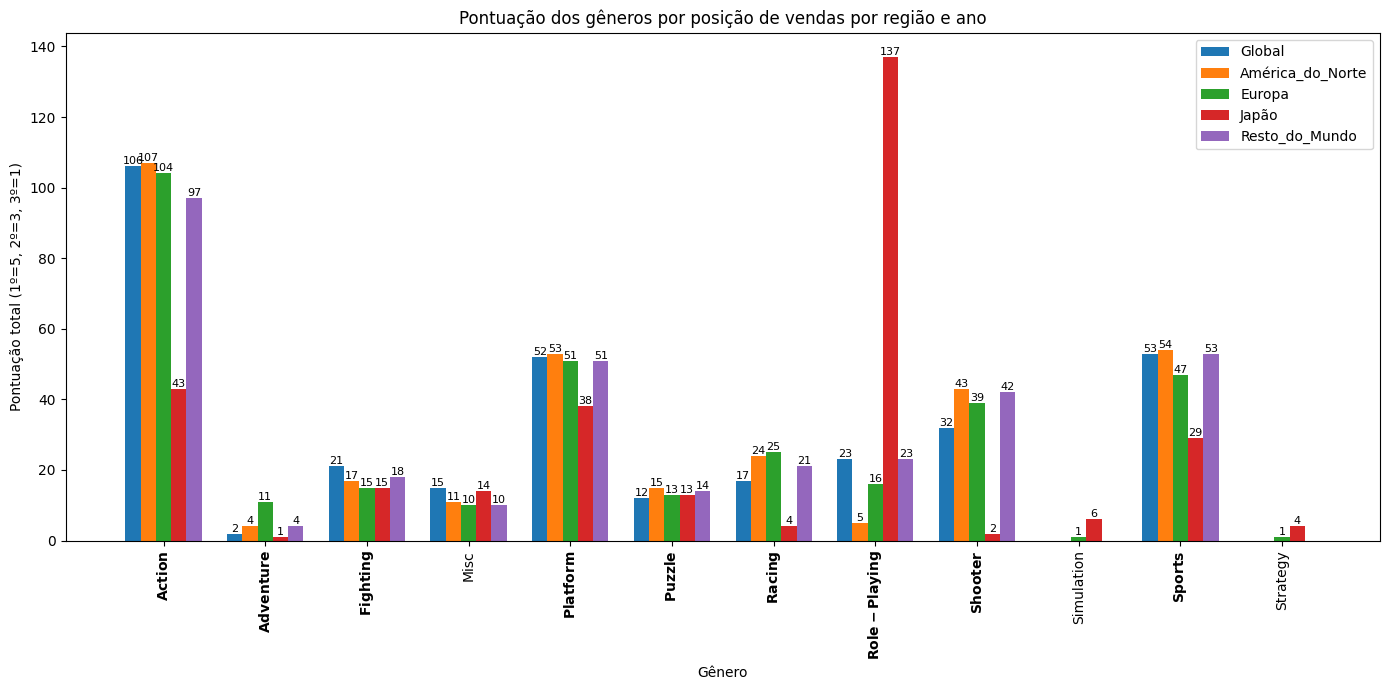

In [0]:
%python
import matplotlib.pyplot as plt
from pyspark.sql.window import Window
import pyspark.sql.functions as F

regions = [
    ("Global_Sales", "Global"),
    ("NA_Sales", "América_do_Norte"),
    ("EU_Sales", "Europa"),
    ("JP_Sales", "Japão"),
    ("Other_Sales", "Resto_do_Mundo")
]

# Tabela com os 3 gêneros por ano e região
result_tables = {}

for sales_col, region_name in regions:
    df = spark.sql(f"""
      SELECT
        Year,
        Genre,
        SUM({sales_col}) AS Total_Vendas
      FROM vg_sales_gold
      GROUP BY Year, Genre
    """)
    window = Window.partitionBy("Year").orderBy(F.desc("Total_Vendas"))
    df_ranked = df.withColumn("rank", F.row_number().over(window)).filter(F.col("rank") <= 3)
    # Renomeia e faz cast da coluna de vendas
    vendas_col_name = f"Total_Vendas_{region_name}"
    df_ranked = df_ranked.withColumn(vendas_col_name, F.col("Total_Vendas").cast("decimal(10,2)")).drop("Total_Vendas")
    result_tables[region_name] = df_ranked.select("Year", "Genre", vendas_col_name, "rank").orderBy("Year", "rank")

# Exibe a tabela para cada região
for region_name, table in result_tables.items():
    print(f"Tabela dos 3 gêneros por ano - {region_name}")
    display(table)

# Pontuação por posição
score_map = {1: 5, 2: 3, 3: 1}
genre_scores = {region_name: {} for _, region_name in regions}

for sales_col, region_name in regions:
    df = result_tables[region_name]
    vendas_col_name = f"Total_Vendas_{region_name}"
    pandas_df = df.select("Year", "Genre", vendas_col_name, "rank").toPandas()
    for _, row in pandas_df.iterrows():
        genre = row["Genre"]
        score = score_map.get(row["rank"], 0)
        total_vendas = float(row[vendas_col_name])
        if total_vendas > 0:
            genre_scores[region_name][genre] = genre_scores[region_name].get(genre, 0) + score

# Prepara dados para o gráfico
all_genres = set()
for scores in genre_scores.values():
    all_genres.update(scores.keys())
all_genres = sorted(list(all_genres))
region_names = [r[1] for r in regions]
data = []
for region in region_names:
    scores = genre_scores[region]
    data.append([scores.get(genre, 0) for genre in all_genres])

# Obtém os gêneros da tabela 37 (usando a variável 'genres' definida anteriormente)
# Se não estiver disponível, execute novamente a lógica da célula 37 para obter 'genres'
genres_bold = set(genres) if 'genres' in locals() else set()

plt.figure(figsize=(14,7))
bar_width = 0.15
x = range(len(all_genres))
bars = []
for i, region in enumerate(region_names):
    bar = plt.bar([g + i*bar_width for g in x], data[i], width=bar_width, label=region)
    bars.append(bar)
    for rect in bar:
        height = rect.get_height()
        if height > 0:
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8, rotation=0)

# Aplica negrito nos gêneros que coincidirem com a tabela 37
xtick_labels = []
for genre in all_genres:
    if genre in genres_bold:
        xtick_labels.append(f"$\\bf{{{genre}}}$")
    else:
        xtick_labels.append(genre)

plt.xticks([g + bar_width*2 for g in x], xtick_labels, rotation=90)
plt.xlabel("Gênero")
plt.ylabel("Pontuação total (1º=5, 2º=3, 3º=1)")
plt.title("Pontuação dos gêneros por posição de vendas por região e ano")
plt.legend()
plt.tight_layout()
plt.show()

# **Resultado Final**


Na soma de vendas globais os dez títulos mais vendidos com seus respectivos gêneros foram sequencialmente:

- Wii Sports/ Sport
- Super Mario Bros/ Plataform.
- Grand Theft Auto V/ Action
- Mario Kart Wii/ Racing
- Wii Sports Resort/ Sport
- Pokemon Red/Pokemon Blue/ Role-Playing
- Call of Duty: Modern Warfare 3/ Shooter
- Tetris/ Puzzle
- New Super Mario Bros./ Plataform
- Call of Duty: Black Ops II/ Shooter

Com isso foi possível verificar que globalmente entre os 10 maiores títulos não foi possível verificar uma dominância entre os gêneros tendo 7 estilos sendo representados e sendo três com representações sendo no máximo 2 unidades. Já nas publisher ocorreu uma clara predominância por parte da Nintendo emplacando 7 desses jogos, sendo seguida pela Activision possuindo 2 títulos e a Take-Two Interactive com apenas 1.
Expandindo as buscas para analisar quais as dez publicadoras possuem uma maior quantidade de venda e vendo aquelas que tem uma média maior nas vendas foi possível avaliar que apenas duas se mantiveram em ambos os rankings a Nintendo e a Take-Two mostrando as duas como potência global no setor.

Na América do Norte a lista de jogos mais vendidos foi

- Wii Sports/ Sport
- Super Mario Bros/ Platform
- Duck Hunt/ Shooter
- Tetris/ Puzzle
- Call of Duty: Black Ops/ Shooter
- Grand Theft Auto V/ Action
- Mario Kart Wii/ Racing
- Wii Sports Resort/ Sport
- Call of Duty: Modern Warfare 3/ Shooter
- Kinect Adventures!/ Misc

Na América do Norte a quantidade de gêneros representados continuou bastante diversificado com os o numero igual de 7 estilos sendo representados, todavia teve um que obteve uma pequena vantagem que foram os jogos de tiro, que pode diretamente estar ligada a cultura de armas existentes nos países dos Estados Unidos e Canada, contendo ao todo 3 jogos no top 10. Em termos de publishers a Nintendo continua se sobressaindo com ao todo 6 indicações, seguido pela Activision com duas e por fim a Take-Two e Microsoft com apenas 1.  
Na parte da analise mais focada nos dados de venda geral das publicadoras a Nintendo, Microsoft e a Take-Two passaram no filtro de venda total e média o que mostra o gosto do público pelos jogos desenvolvidos pelas empresas.

Passando para a região da Europa

- Wii Sports/ Sport
- Grand Theft Auto V/ Action
- Mario Kart Wii/ Racing
- Fifa 15/ Sports
- Call of Duty: Modern Warfare 3/ Shooter
- Fifa 16/ Sports
- Fifa 14/ Sports
- Call of Duty: Black Ops II/ Shooter
- Wii Sports Resort/ Sports
- Nintendogs/ Simulation

Na Europa houve uma diminuição na quantidade de gêneros para um total de 5 com uma predominância clara do gênero de sport contemplando um total de 5 títulos, além de Shoother(2), Action(1), Racing(1) e Simulation(1). Nessa região embora a Nintendo continue como a publisher no topo do ranking com quatro posições no ranking a sua dominância foi reduzida tendo apenas um único titulo a mais que a Eletronic Arts sendo seguidos pela Activision(2) e a Take-Two(1).
Na segunda parte da nossa análise cinco empresas passaram no filtro sendo estas a Nintendo, Microsoft, Take-Two, Sony e Eletronic Arts o que demonstra ser um mercado de fato bastante diversificado e com gostos bem variados

No Japão é a região mais destoante das demais tanto nos gêneros dos jogos como na publicadora devido a alta concentração de seus dados.

- Pokemon Red/Pokemon Blue/ Role-Playing
- Pokemon Gold/Pokemon Silver/ Role-Playing
- Super Mario Bros./ Platform
- New Super Mario Bros./ Platform
- Pokemon Diamond/Pokemon Pearl/ Role-Playing
- Pokemon Black/Pokemon White/ Role-Playing
- Pokemon Ruby/Pokemon Sapphire/ Role-Playing
- Animal Crossing: Wild World/ Simulation
- Brain Age 2: More Training in Minutes a Day/ Puzzle
- Monster Hunter Freedom 3/ Role-Playing

Aqui a concentração de gêneros resultou em apenas 4 gêneros conquistando o topo, sendo o de Role-Playing correspondendo a seis títulos no ranking graças ao interesse pela franquia do Pokémon compondo metade do ranking. Em termos de Publisher a Nintendo continua dominando de maneira esmagadora com nove títulos e a Capcom fecha o ranking. Vale ressaltar que ambas as empresas tiveram seu local de fundação justamente o país do Japão.
Como não era para ser diferente no Japão apenas três empresas, com no mínimo de 5 jogos lançados, passaram no filtro de avaliação de total de vendas e a média dessas vendas com a quantidade de títulos lançados que são a Enix Corporation, Square Soft e a Nintendo. Sendo estas empresas totalmente sediadas no Japão sendo mais um indicativo que o gosto da população da região por jogos produzidos localmente. 

Por fim o resto do globo

- Grand Theft Auto: San Andreas/ Action
- Wii Sports/ Sports
- Gran Turismo 4/ Racing
- Grand Theft Auto V/ Action
- Call of Duty: Black Ops II/ Shooter
- FIFA Soccer 08/ Sports
- Call of Duty: Black Ops 3/ Shooter
- Call of Duty: Modern Warfare 3/ Shooter
- Mario Kart Wii/ Racing
- FIFA 15/ Sports

Assim como no Japão, o Resto do Mundo apenas quatro gêneros foram os mais buscados pelo público, todavia dessa vez eles foram mais uniformes sendo os vencendores o de Sports e Shooter tendo três títulos seguidos pelos Action e Racing com dois títulos cada um. Em termos de publicadores pela primeira vez a Nintendo não é a que possui mais representantes com apenas duas aparições, tendo seu posto sido ocupado pela Activision que com sua franquia do Call Of Duty conseguindo emplacar 3 títulos. Para fechar a Eletronic Arts(2), Take-Two(2) e a Sony Computer(1) também aparecem no ranking.
Na pesquisa mais amplificada da atuação das empresas, assim como na Europa, um número variado de empresas obtiveram o êxito de passar nas restrições sendo estas a Nintendo, que conseguiu a proeza de estar representada em todas as regiões do globo, Take Two Interactive, Sony, Microsoft e a Eletronic Arts
